In [ ]:
#supervised learning algorithm  :-
#Classification Algorithm : 
#SVM : Support Vector Machine  : -

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To laod Dataset 
df=pd.read_csv("bank.csv")

#To show first 5 records
df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
1    5      8      1467         1     -1         0         3        1  
2    5      8      1389         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1  
4    5      8       673         2     -1         0         3        1

In [3]:
#To show the no. of rows and columns 
df.shape

(11162, 17)

In [4]:
#To check null values in given dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
#check datatypes 
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

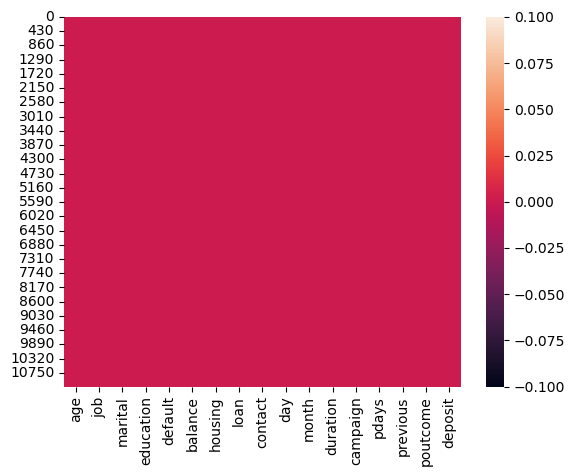

In [6]:
#visualise null values
sns.heatmap(df.isnull())
plt.show()

In [7]:
#To check duplicates rows 
df.duplicated().sum()

0

In [8]:
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

In [9]:
#separate input and output 
X=df.drop("deposit",axis=1) #select input 
Y=df["deposit"] #select output

In [10]:
#train test split : inbuilt function train_test_split()
from sklearn.model_selection import train_test_split

#split 70%-30%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,
                                               random_state=1)

In [11]:
X_train.shape,X_test.shape

((7813, 16), (3349, 16))

In [12]:
#feature scaling : all inputs on same units : use StandardScaler 
#apply scaling on input X_train and X_test 
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train) 
X_test=ss.transform(X_test) 

In [15]:
#create a user defined function 
def create_model(model):
    model.fit(X_train,Y_train) #train the model with 70% data
    #To test the model with 30% data 
    Y_pred=model.predict(X_test)
    #print confusion marix
    print(confusion_matrix(Y_test,Y_pred))
    #generate classification report
    print(classification_report(Y_test,Y_pred))
    return model   

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Logistic Regression
#DecisionTreeClassifier
#Pruning Technique
#RandomForestTree
#ADA Boost
#Gradient Boost
#Extreme Gradient Boost 

In [17]:
#Apply Support Vector Machine 
#Apply Linear Kernel function  means data are Linearly Separatable with 
#the help of Straight Line , It is known as Decision Boundary or 
#HyperPlane . 
#use inbuilt class LinearSVC   : SVC means support vector classifier
#LinearSVc class define in svm outer class -->sklearn
from sklearn.svm import LinearSVC

In [18]:
#create the object of LinearSVC class
svc=LinearSVC(random_state=1) #hard margin 
#svc is a object name 

In [19]:
#call function
svc=create_model(svc)

[[1444  316]
 [ 364 1225]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [24]:
#here recall (1) : 0.77(77%) which is good but we can more better 
#behind the region of Less score , model can be overfit : cause outlier 
#present in dataset 
#to reduce overfit , add some external error on training time 
#create the object of LinearSVC class and passing the parameter
#C for add error 
#value of parameter C between >0 and <1
#It is called soft margin
svc1=LinearSVC(random_state=1,C=0.08)
#call function
svc1=create_model(svc1)

[[1446  314]
 [ 363 1226]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.80      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [ ]:
#no changes scores if add external error means data is non-linear 
#if data is non-linear then give the dataset to Non-linear Kernel 
#function : -
#There are 2 types of Non-Linear Kernel Function : -
#1. polynomial kernel function :  in ths function , we will increase the
#dimension , means we have 1 dimension Data , then converts 2 DImension 
#and 2 Dimension data , then converts 3D and so on 
#2. Radial basis kernel function 

In [25]:
#1. Polynomial kernel function : - 
#non linear kernel function  , use inbuilt class SVC (support vector 
#classifier)
#SVC class define in svm outer class
from sklearn.svm import SVC

In [26]:
#create object of SVC class
svc1=SVC(random_state=1,kernel="poly")

In [27]:
#call function 
svc1=create_model(svc1)

[[1417  343]
 [ 311 1278]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1760
           1       0.79      0.80      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349



In [29]:
#radial basis kernel function
#create object of SVC class
svc2=SVC(random_state=1,kernel="rbf") #rbf means radial basis function
#call function 
svc2=create_model(svc2)

[[1407  353]
 [ 262 1327]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1760
           1       0.79      0.84      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

